In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import datetime
import calendar

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import seaborn as sns

plt.style.use('Cole_2018.mplstyle')
sns.set_style('whitegrid')

# 1. Load data
* Data was scraped and processed in the previously numbered notebooks

In [2]:
# Load table of fact checks
df_checks = pd.read_csv('/gh/data/politifact/20190701scrape/processed_v2.csv')
df_checks['date'] = pd.to_datetime(df_checks['date'])
df_checks.head()

,name,statement,source,date,finding,comment,article_page,identity_id,truth_score
0,Donald Trump,"""The Obama administration was begging for a me...",PolitiFact National,2019-07-01,False,Obama set high bar for meetings,/truth-o-meter/statements/2019/jul/01/donald-t...,donald-trump,1.0
1,Facebook posts,Six Flags is offering five free passes and unl...,PolitiFact Facebook fact-checks,2019-07-01,False,Summer scam-o-rama,/facebook-fact-checks/statements/2019/jul/01/f...,facebook-posts,1.0
2,Beto O'Rourke,"""The Census is predicting a 6% undercount that...",PolitiFact Texas,2019-07-01,Half-True,Confuses key details,/texas/statements/2019/jul/01/beto-orourke/oro...,beto-orourke,3.0
3,Elizabeth Warren,"""Prison phone companies charge as much as $25 ...",PolitiFact National,2019-07-01,Mostly True,"In some jails, talk isn't cheap",/truth-o-meter/statements/2019/jul/01/elizabet...,elizabeth-warren,4.0
4,Ta-Nehisi Coates,"""The typical black family in this country has ...",PunditFact,2019-07-01,True,Racial gap has persisted for years,/punditfact/statements/2019/jul/01/ta-nehisi-c...,ta-nehisi-coates,5.0


In [3]:
# Load table of fact checks
df_info = pd.read_csv('/gh/data/politifact/20190707scrape_personalities/processed_v2.csv')
df_info.head()

,title,bio,party_title,state,identity_id,name,identity_type
0,Our Texas Values feeds,"Established in 2012, Texas Values is an Austin...",NaN,NaN,texas-values,Texas Values,NaN
1,Democrat from Ohio,Teresa Fedor is a Democrat in the Ohio House o...,D,Ohio,teresa-fedor,Teresa Fedor,NaN
2,Our Susana Mendoza feeds,Susana Mendoza is the Illinois comptroller. Me...,NaN,NaN,susana-mendoza,Susana Mendoza,NaN
3,Republican from Virginia,"Stephen Martin, R-Chesterfield, represents the...",R,Virginia,stephen-martin,Stephen Martin,NaN
4,None from Ohio,Brent Larkin writes a weekly column for The Pl...,NaN,Ohio,brent-larkin,Brent Larkin,NaN


In [4]:
# Merge identity info into fact checks
df = df_checks.merge(df_info, on=['name', 'identity_id'])
df.head()

,name,statement,source,date,finding,comment,article_page,identity_id,truth_score,title,bio,party_title,state,identity_type
0,Donald Trump,"""The Obama administration was begging for a me...",PolitiFact National,2019-07-01,False,Obama set high bar for meetings,/truth-o-meter/statements/2019/jul/01/donald-t...,donald-trump,1.0,Republican from New York,Donald Trump is the president of the United St...,R,New York,person
1,Donald Trump,"California ""admitted"" there were ""a million"" i...",PolitiFact California,2019-06-24,Pants on Fire!,Voter fraud claim remains baseless,/california/statements/2019/jun/24/donald-trum...,donald-trump,0.0,Republican from New York,Donald Trump is the president of the United St...,R,New York,person
2,Donald Trump,"Says the Central Park Five ""admitted their gui...",PolitiFact National,2019-06-24,Mostly False,No confession to the rape itself,/truth-o-meter/statements/2019/jun/24/donald-t...,donald-trump,2.0,Republican from New York,Donald Trump is the president of the United St...,R,New York,person
3,Donald Trump,"""When I became president, President Obama had ...",PolitiFact National,2019-06-21,False,"Repeated claim, still false",/truth-o-meter/statements/2019/jun/21/donald-t...,donald-trump,1.0,Republican from New York,Donald Trump is the president of the United St...,R,New York,person
4,Donald Trump,"""Well, I got 52% (of women voters). And I will...",PolitiFact National,2019-06-20,Mostly False,"Not all women, percent is only for white women",/truth-o-meter/statements/2019/jun/20/donald-t...,donald-trump,2.0,Republican from New York,Donald Trump is the president of the United St...,R,New York,person


# 2. Metadata and distributions

In [5]:
print('Number of fact checks: {}'.format(len(df_checks)))
print('Number of unique identities: {}'.format(len(df_info)))
print('Number of people with information: {}'.format(len(df_info[df_info['identity_type']=='person'].dropna())))

Number of fact checks: 16208
Number of unique identities: 4086
Number of people with information: 293


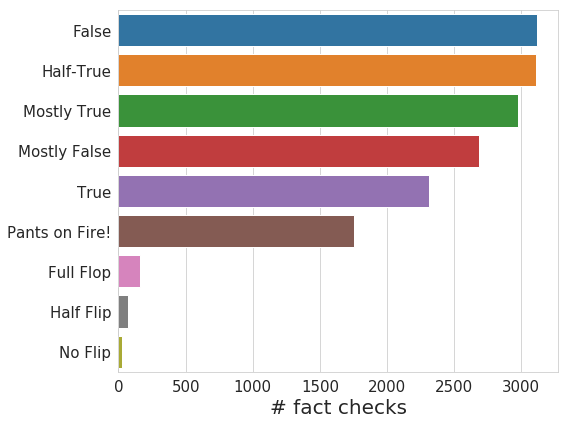

In [6]:
plt.figure(figsize=(8,6))
sns.countplot(y='finding',data=df_checks,
              order=df_checks['finding'].value_counts().index)
plt.xlabel('# fact checks')
plt.ylabel('')
plt.tight_layout()
plt.savefig('/gh/srcole.github.io/assets/politifact/1_n_checks_by_truth_category.png')

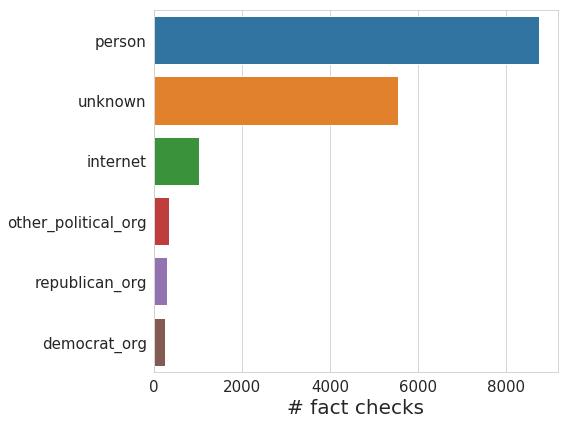

In [7]:
df_plt = df.copy()
df_plt['identity_type'] = df_plt['identity_type'].fillna('unknown')

plt.figure(figsize=(8,6))
sns.countplot(y='identity_type',data=df_plt,
              order=df_plt['identity_type'].value_counts().index)
plt.xlabel('# fact checks')
plt.ylabel('')
plt.tight_layout()
plt.savefig('/gh/srcole.github.io/assets/politifact/2_n_checks_by_identity_type.png')

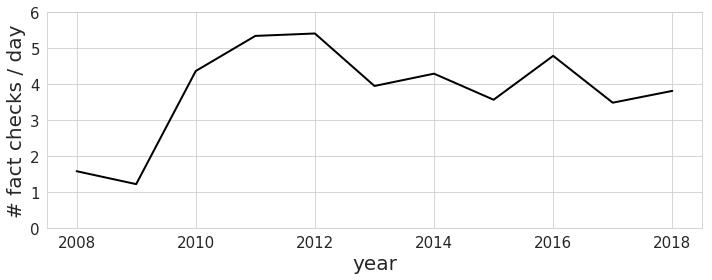

In [8]:
# Add extra date cols
df_checks['year'] = df_checks['date'].dt.year
df_checks['month_name'] = df_checks['date'].dt.month_name()
df_checks['day_of_week'] = df_checks['date'].dt.day_name()
# df_checks['date_month_round'] = pd.to_datetime([datetime.datetime(dt.year, dt.month, 1) for dt in df_checks['date']])
df_checks['month_year'] = pd.to_datetime(['{}/{}'.format(dt.month, dt.year) for dt in df_checks['date']])


# Number of fact checks per year
n_checks_per_day = df_checks.groupby('year')['name'].count().reset_index().rename(columns={'name': 'count'})
n_checks_per_day['n_days'] = [366 if calendar.isleap(y) else 365 for y in n_checks_per_day['year']]
n_checks_per_day['n_per_day'] = n_checks_per_day['count'] / n_checks_per_day['n_days']
n_checks_per_day = n_checks_per_day[~n_checks_per_day['year'].isin([2007, 2019])]
     
plt.figure(figsize=(10,4))
sns.lineplot(x='year', y='n_per_day', data=n_checks_per_day, color='k')
plt.xlabel('year')
plt.ylabel('# fact checks / day')
plt.ylim((0,6))
plt.tight_layout()
plt.savefig('/gh/srcole.github.io/assets/politifact/3_avg_checks_per_day_year.png')

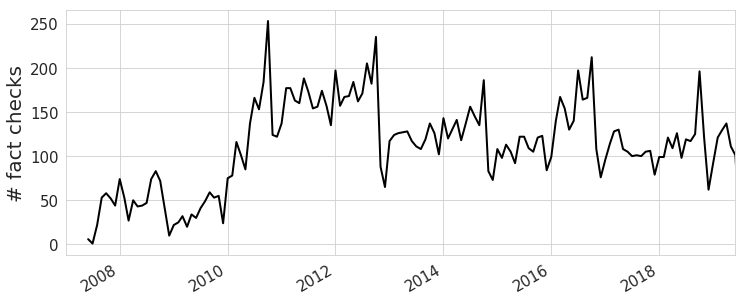

In [9]:
# Number of fact checks per month
plt.figure(figsize=(12,5))
df_checks.groupby('month_year')['finding'].count().plot(color='k')
plt.xlim((datetime.datetime(2007,1,1)), datetime.datetime(2019,6,1))
plt.xlabel('')
plt.ylabel('# fact checks')
plt.savefig('/gh/srcole.github.io/assets/politifact/4_n_checks_per_month.png')

# 3. Person-level analysis

In [10]:
# Compute number of fact checks for each identity
n_checks_per_id = df['identity_id'].value_counts().reset_index() \
    .rename(columns={'index': 'identity_id', 'identity_id': 'n_checks'})

# Get average truth score for each person
avg_truths_by_id = df.groupby('identity_id')['truth_score'].mean().reset_index() \
    .rename(columns={'truth_score': 'avg_truth_score'})

# Merge this onto df_info
df_info_stats = df_info.merge(n_checks_per_id, on='identity_id', how='left')
df_info_stats = df_info_stats.merge(avg_truths_by_id, on='identity_id', how='left')

# only consider people
df_people = df_info_stats[df_info_stats['identity_type']=='person'].reset_index(drop=True)
df_people.head()

,title,bio,party_title,state,identity_id,name,identity_type,n_checks,avg_truth_score
0,Democrat from New York,Michael Bloomberg is the former mayor of New Y...,D,New York,michael-bloomberg,Michael Bloomberg,person,13,3.692308
1,Democrat from Ohio,Sherrod Brown is a Democratic U.S. Senator rep...,D,Ohio,sherrod-brown,Sherrod Brown,person,38,3.578947
2,Our Kathleen Vinehout feeds,Democrat Kathleen Vinehout is a Wisconsin stat...,NaN,NaN,kathleen-vinehout,Kathleen Vinehout,person,8,2.875000
3,Republican from Texas,"Debra Medina, a Wharton businesswoman, sought ...",R,Texas,debra-medina,Debra Medina,person,6,3.166667
4,Our Lou Dobbs feeds,Lou Dobbs is a television host on Fox Business...,NaN,NaN,lou-dobbs,Lou Dobbs,person,6,1.600000


### 3a. Ranking of people with most fact checks

/Users/scott/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


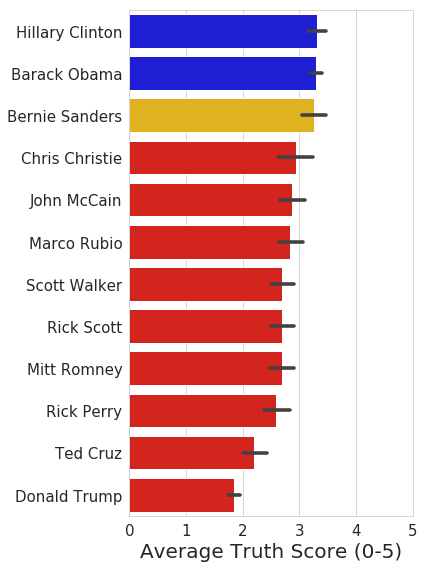

In [11]:
# Determine people to consider
n_fact_check_min = 100
people_high_checks = df_people[df_people['n_checks'] > n_fact_check_min]['identity_id']

# Only consider fact checks by those people
df_plt = df[df['identity_id'].isin(people_high_checks)]

# Define bar color
order = df_plt.groupby('name')['truth_score'].mean().sort_values(ascending=False).index
df_people['bar_color'] = df_people['party_title'].map({'R': .9, 'D': .1, 'I': .7})
color_lookup = dict(zip(df_people['name'], df_people['bar_color']))
bar_color_numbers = [color_lookup[k] for k in order]

plt.figure(figsize=(6, 8))
sns.barplot(x='truth_score', y='name', data=df_plt,
            palette=cm.jet(bar_color_numbers),
            order=order
           )
plt.xlabel('Average Truth Score (0-5)')
plt.ylabel('')
plt.xlim((0,5))
plt.tight_layout()
plt.savefig('/gh/srcole.github.io/assets/politifact/5_avg_truth_by_person_most_checks.png')

### 3b. Ranking of more people

/Users/scott/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


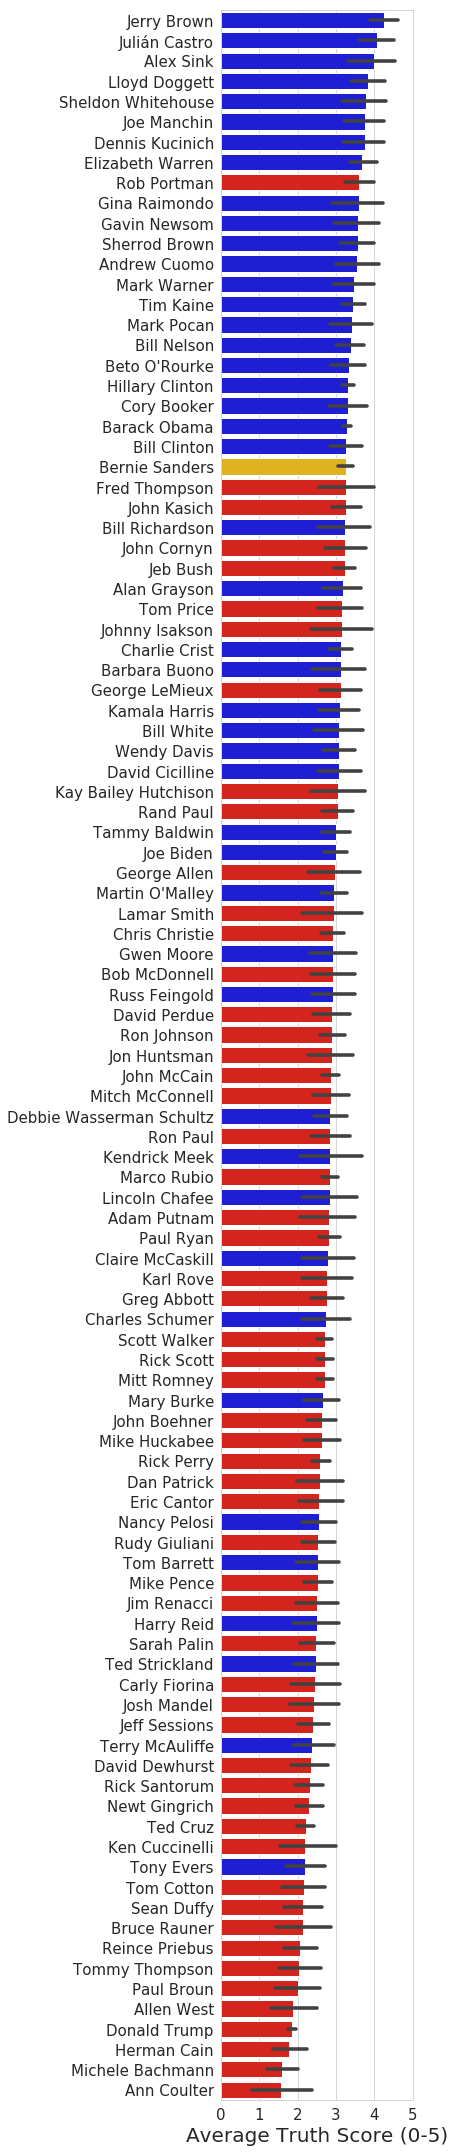

In [12]:
# Determine people to consider
n_fact_check_min = 15
people_high_checks = df_people[df_people['n_checks'] > n_fact_check_min]['identity_id']

# Only consider fact checks by those people
df_plt = df[df['identity_id'].isin(people_high_checks)]

# Only consider people we have party ID for
df_plt = df_plt.dropna(subset=['party_title'])

# Define bar color
order = df_plt.groupby('name')['truth_score'].mean().sort_values(ascending=False).index
df_people['bar_color'] = df_people['party_title'].map({'R': .9, 'D': .1, 'I': .7})
color_lookup = dict(zip(df_people['name'], df_people['bar_color']))
bar_color_numbers = [color_lookup[k] for k in order]

plt.figure(figsize=(6, 30))
sns.barplot(x='truth_score', y='name', data=df_plt,
            palette=cm.jet(bar_color_numbers),
            order=order
           )
plt.xlabel('Average Truth Score (0-5)')
plt.xticks(np.arange(6))
plt.ylabel('')
plt.xlim((0,5))
plt.tight_layout()
plt.savefig('/gh/srcole.github.io/assets/politifact/6_avg_truth_by_person_15_checks.png')

### 3d. Difference in distributions between people

/Users/scott/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/scott/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


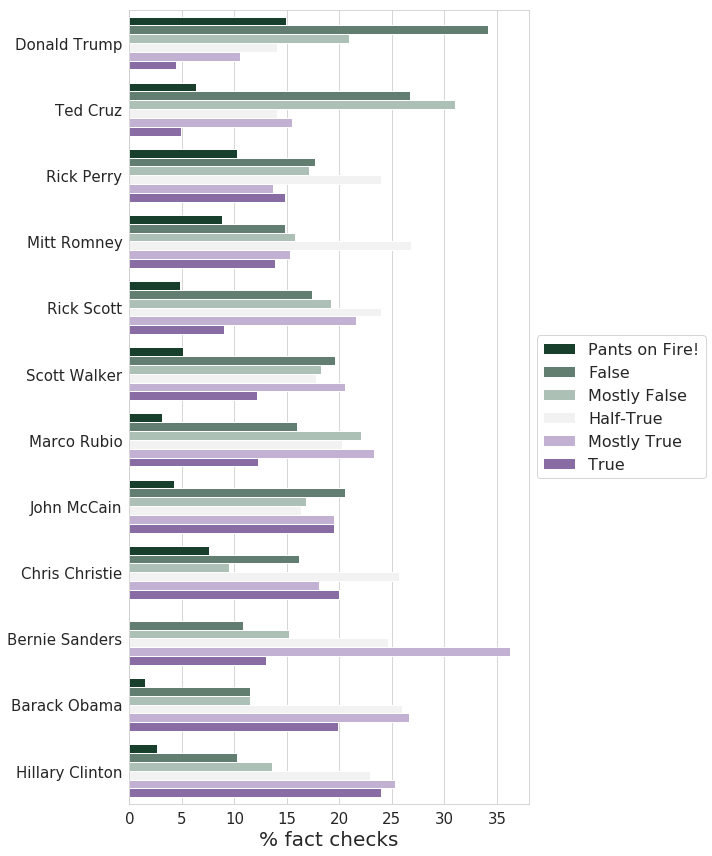

In [13]:
# Determine people to consider
n_fact_check_min = 100
people_high_checks = df_people[df_people['n_checks'] > n_fact_check_min]['identity_id']

# Only consider fact checks by those people
df_pre = df[df['identity_id'].isin(people_high_checks)]

df_temp1 = df_pre.groupby(['truth_score', 'name'])['date'].count().reset_index().rename(columns={'date':'n_checks'})
df_temp2 = df_pre.groupby('name')['date'].count().reset_index().rename(columns={'date':'n_checks_total'})
df_temp1 = df_temp1.merge(df_temp2, on=['name'], how='left')
df_temp1['frac_checks'] = df_temp1['n_checks'] / df_temp1['n_checks_total']
df_plt = df_temp1[['truth_score', 'name', 'frac_checks']]


truth_score_dict = {'True': 5,
                    'Mostly True': 4,
                    'Half-True': 3,
                    'Mostly False': 2,
                    'False': 1,
                    'Pants on Fire!': 0}
score_to_truth = {v: k for k, v in truth_score_dict.items()}
df_plt['truth_score'] = df_plt['truth_score'].map(score_to_truth)
df_plt['pc_checks'] = df_plt['frac_checks'] * 100

plt.figure(figsize=(10,12))
sns.barplot(hue='truth_score', x='pc_checks', y='name', data=df_plt,
            palette=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            order=df_pre.groupby('name')['truth_score'].mean().sort_values().index)
plt.legend(fontsize=16, loc='center left', bbox_to_anchor=(1,.5))
plt.ylabel('')
plt.xlabel('% fact checks')
plt.tight_layout()
plt.savefig('/gh/srcole.github.io/assets/politifact/7_breakdown_truth_by_person_most_checks.png')